In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# [Size (sqft), Bedrooms, Age (years), Price ($1000s)]
data = [
  [650, 1, 20, 70],
  [800, 2, 15, 85],
  [900, 2, 30, 78],
  [1100, 3, 18, 112],
  [1200, 3, 10, 120],
  [1400, 3, 12, 135],
  [1500, 4, 8, 160],
  [1700, 4, 6, 170],
  [1850, 4, 5, 175],
  [2000, 5, 4, 210]
]

x1 = [row[0] for row in data]
x2 = [row[1] for row in data]
x3 = [row[2] for row in data]
ys = [row[3] for row in data]
m = len(data)

In [ ]:
def normalize(x:list):
  """z-square normalization"""
  mean_x = sum(x) / m
  std_x = (sum((x - mean_x) ** 2 for x in x) / m) ** 0.5
  x_norm = [(x - mean_x) / std_x for x in x]
  return x_norm

x1_norm = normalize(x1)
x2_norm = normalize(x2)
x3_norm = normalize(x3)
x3_norm

[-0.9944319849593332,
 -0.9982863724979352,
 -0.986723209882129,
 -0.9959737399747739,
 -1.0021407600365373,
 -1.0005990050210964,
 -1.0036825150519781,
 -1.005224270067419,
 -1.0059951475751394,
 -1.0067660250828598]

In [13]:
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
w = [0.0,0.0,0.0]
b = 0.0
learning_rate = 0.000001
epochs = 2000
tolerance = 1e-6
prev_cost = float('inf')

for epoch in range(epochs):
  dw = [0.0]*3
  db = 0.0

  for i in range(m):
    x_i = x[i]
    y_pred = sum(w[j]*x_i[j] for j in range(3)) + b
    error = y_pred-ys[i]

    for j in range(3):
      dw[j] += error * x_i[j]
    db += error
  
  for j in range(3):
    dw[j] /= m
  db/=m

  for j in range(3):
    w[j] -= learning_rate * dw[j]
  b -= learning_rate * db

  if epoch % 100 == 0:
      # Optional: print progress
      cost = sum( (sum(w[j]*x_i[j] for j in range(3)) + b - ys[i])**2 for i in range(m) ) / m
      if (abs(cost - prev_cost) < tolerance):
          print(f"Stopped at epoch {epoch}")
          break
      prev_cost = cost
      print(f"Epoch {epoch}: cost = {cost:.4f}")

# Final model
print("\nTrained model:")
print(f"w = {w}, b = {b:.4f}")

Epoch 0: cost = 19260.1777
Epoch 100: cost = 19247.9527
Epoch 200: cost = 19235.7354
Epoch 300: cost = 19223.5257
Epoch 400: cost = 19211.3236
Epoch 500: cost = 19199.1291
Epoch 600: cost = 19186.9422
Epoch 700: cost = 19174.7629
Epoch 800: cost = 19162.5912
Epoch 900: cost = 19150.4272
Epoch 1000: cost = 19138.2707
Epoch 1100: cost = 19126.1217
Epoch 1200: cost = 19113.9804
Epoch 1300: cost = 19101.8466
Epoch 1400: cost = 19089.7205
Epoch 1500: cost = 19077.6018
Epoch 1600: cost = 19065.4908
Epoch 1700: cost = 19053.3873
Epoch 1800: cost = 19041.2913
Epoch 1900: cost = 19029.2029

Trained model:
w = [0.08745886367868931, -0.26213750807101266, -0.2626648030813934], b = 0.2622


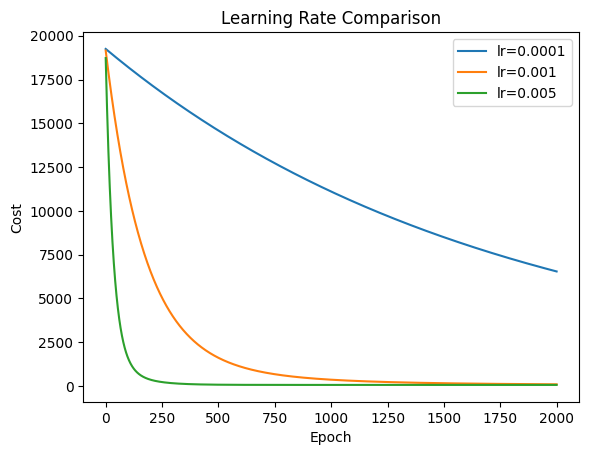

In [19]:
# learning rate sweep visualization
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
learning_rates = [0.0001, 0.001, 0.005]
epochs = 2000
all_costs = []

for lr in learning_rates:
  w = [0.0,0.0,0.0]
  b = 0.0
  costs = []
  for epoch in range(epochs):
    dw = [0.0]*3
    db = 0.0

    for i in range(m):
      y_pred = sum(w[j] * x[i][j] for j in range(3)) + b
      error = y_pred - ys[i]
      for j in range(3):
          dw[j] += error * x[i][j]
      db += error
    for j in range(3):
      w[j] -= lr * dw[j] / m
    b -= lr * db / m

    # Record cost
    cost = sum((sum(w[j] * x[i][j] for j in range(3)) + b - ys[i]) ** 2 for i in range(m)) / m
    costs.append(cost)

  all_costs.append((lr, costs))

# Plot cost curves
for lr, costs in all_costs:
    plt.plot(range(epochs), costs, label=f"lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.title("Learning Rate Comparison")
plt.show()

In [36]:
# adaptive learning rate
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
w = [0.0,0.0,0.0]
b = 0.0
learning_rate = 0.0001
epochs = 20000
tolerance = 1e-4
increase_factor = 1.05
decrease_factor = 0.7
min_lr, max_lr = 1e-5, 1.0
prev_cost = float('inf')

for epoch in range(epochs+1):
  dw = [0.0]*3
  db = 0.0

  for i in range(m):
    x_i = x[i]
    y_pred = sum(w[j]*x_i[j] for j in range(3)) + b
    error = y_pred-ys[i]

    for j in range(3):
      dw[j] += error * x_i[j]
    db += error
  
  for j in range(3):
    dw[j] /= m
  db/=m

  for j in range(3):
    w[j] -= learning_rate * dw[j]
  b -= learning_rate * db

  if epoch % 500 == 0:
      # Optional: print progress
      cost = sum( (sum(w[j]*x_i[j] for j in range(3)) + b - ys[i])**2 for i in range(m) ) / m
      if (cost < prev_cost - tolerance):
        learning_rate = min(learning_rate * increase_factor, max_lr)
      else:
         learning_rate = max(learning_rate * decrease_factor, min_lr)
      prev_cost = cost

      print(f"Epoch {epoch}: cost = {cost:.4f} | Learning Rate: {learning_rate:.5f}")

# Final model
print("\nTrained model:")
print(f"w = {w}, b = {b:.4f}")

Epoch 0: cost = 19248.0733 | Learning Rate: 0.00011
Epoch 500: cost = 13782.2535 | Learning Rate: 0.00011
Epoch 1000: cost = 9711.5865 | Learning Rate: 0.00012
Epoch 1500: cost = 6767.8805 | Learning Rate: 0.00012
Epoch 2000: cost = 4718.5278 | Learning Rate: 0.00013
Epoch 2500: cost = 3365.3460 | Learning Rate: 0.00013
Epoch 3000: cost = 2542.5599 | Learning Rate: 0.00014
Epoch 3500: cost = 2114.1286 | Learning Rate: 0.00015
Epoch 4000: cost = 1970.6253 | Learning Rate: 0.00016
Epoch 4500: cost = 2025.8758 | Learning Rate: 0.00011
Epoch 5000: cost = 2140.7593 | Learning Rate: 0.00008
Epoch 5500: cost = 2244.8102 | Learning Rate: 0.00005
Epoch 6000: cost = 2325.7761 | Learning Rate: 0.00004
Epoch 6500: cost = 2385.4853 | Learning Rate: 0.00003
Epoch 7000: cost = 2428.4888 | Learning Rate: 0.00002
Epoch 7500: cost = 2459.0966 | Learning Rate: 0.00001
Epoch 8000: cost = 2480.7425 | Learning Rate: 0.00001
Epoch 8500: cost = 2497.8013 | Learning Rate: 0.00001
Epoch 9000: cost = 2514.9548 |

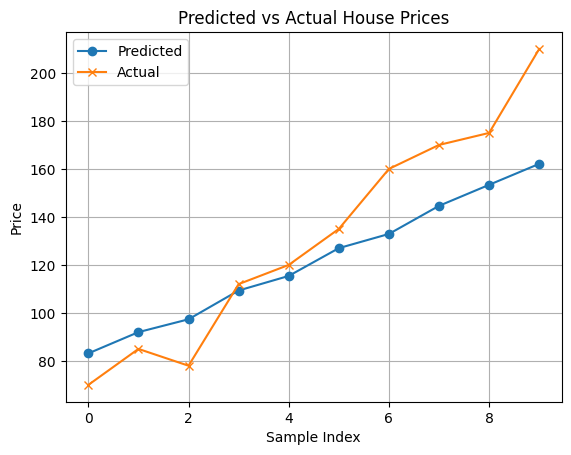

In [38]:
pred_y = [np.dot(w,x[i]) + b for i in range(m)]

# Plot
plt.plot(range(len(pred_y)), pred_y, marker='o', label='Predicted')
plt.plot(range(len(ys)), ys, marker='x', label='Actual')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.grid(True)
plt.show()
